#              **Loan Prediction bases on Train and Test Data**:


---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Objective**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing**](#Section7)<br>
  - **7.1** [**Feature Encoding**](#Section71)
  - **7.2** [**Data Preparation**](#Section72)
  
**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>


---
<a name = Section1></a>
# **1. Problem Statement**
---

- Dream Housing Finance company deals in all kinds of home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan and after that, the company validates the customer eligibility for the loan.

- The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out online application forms. These details are Gender, Marital Status, Education, number of Dependents, Income, Loan Amount, Credit History, and others.

---
<a name = Section2></a>
# **2. Objective**
---

- As mentioned above this is a Binary Classification problem in which we need to predict our Target label which is “Loan Status”.

    Loan status can have two values: Yes or NO.

    Yes: if the loan is approved

    NO: if the loan is not approved

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [ ]:
!pip install -q datascience                                                       # Package that is required by pandas profiling
!pip install -q pandas-profiling  

     |████████████████████████████████| 71kB 4.4MB/s 


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [ ]:
!pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.contingency import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                                   # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
- The dataset has been provided by lending club and its description is shown below in the table.


In [2]:
Loan_train = pd.read_csv("train.csv")
Loan_test = pd.read_csv("test.csv")

In [3]:
Loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
Loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
print("Loan train data shape", Loan_train.shape)
print("Loan test data shape", Loan_test.shape)

Loan train data shape (614, 13)
Loan test data shape (367, 12)


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [6]:
Loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<a name = Section42></a>
### **4.2 Data Information**

 - In this section, we will get **information about the data** and see some observations.


In [7]:
Loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Observation:**

- We can observe that there is **null data present** and some **features** have **Incorrect data types**.

In [8]:
Loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

In [9]:
def data_prep(df):
  #imputing missing values in discrete variables
  df['Gender'] = np.where(df['Gender'].isnull(), 'Male', df['Gender'])
  df['Married'] = np.where(df['Married'].isnull(), 'Yes', df['Married'])
  df['Dependents'].replace('3+', '3', inplace=True)
  df['Dependents'] = np.where(df['Dependents'].isnull(), '0', df['Dependents'])
  df['Dependents']= df['Dependents'].astype('int')
  df['Self_Employed'] = np.where(df['Self_Employed'].isnull(), 'No', df['Self_Employed'])

  #imputing missing values in continuous variables
  df['LoanAmount'] = np.where(df['LoanAmount'].isnull(), df['LoanAmount'].median(skipna=True), df['LoanAmount'])
  df['Loan_Amount_Term'] = np.where(df['Loan_Amount_Term'].isnull(), df['Loan_Amount_Term'].median(skipna=True), df['Loan_Amount_Term'])
  df['Credit_History'] = np.where(df['Credit_History'].isnull(), df['Credit_History'].median(skipna=True), df['Credit_History'])
  df['Credit_History']= df['Credit_History'].astype('int')
  return df

In [10]:
train= data_prep(Loan_train)

In [11]:
test= data_prep(Loan_test)

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

In [12]:
train.skew()

Dependents           1.015551
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

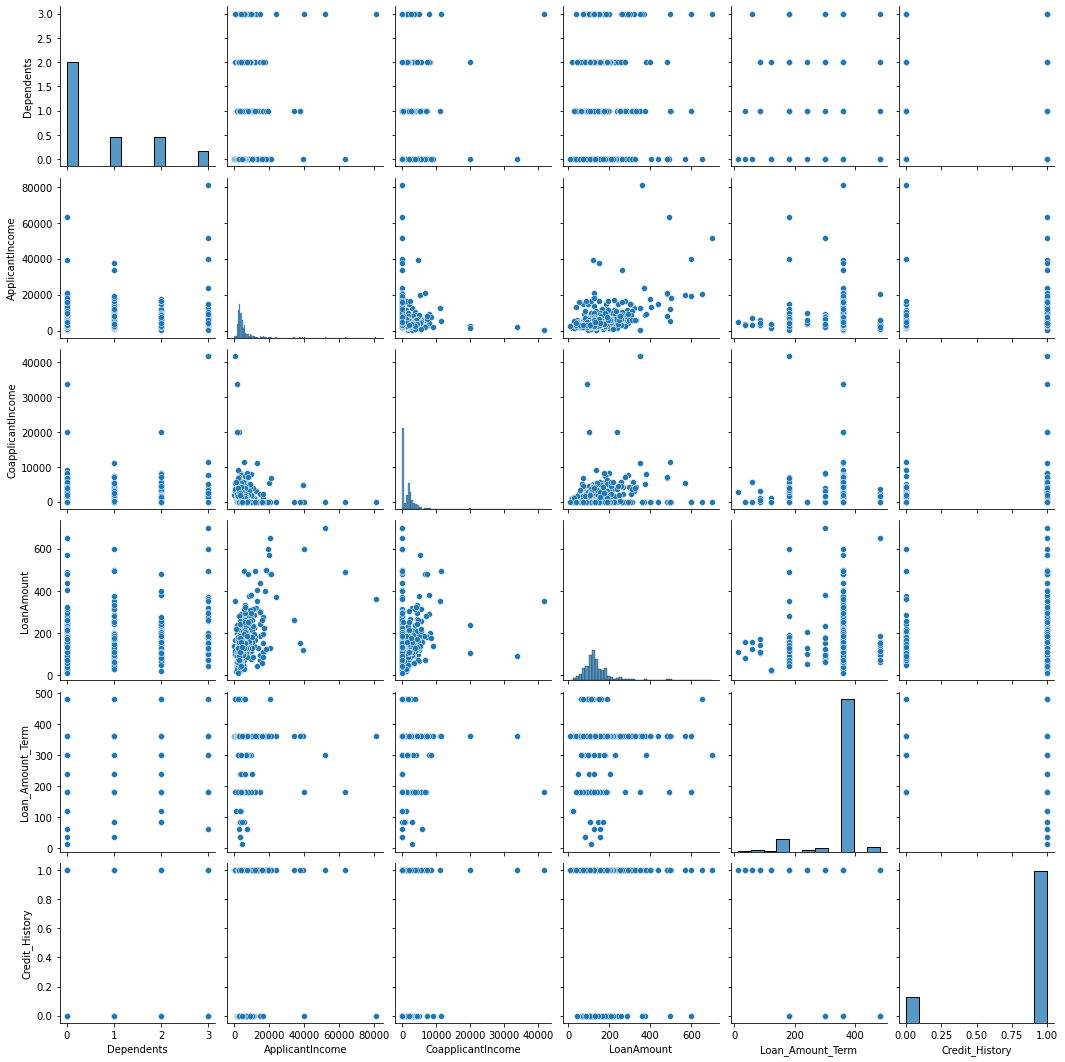

In [13]:
sns.pairplot(train)

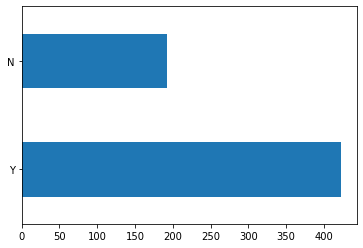

In [14]:
train['Loan_Status'].value_counts().plot(kind="barh")

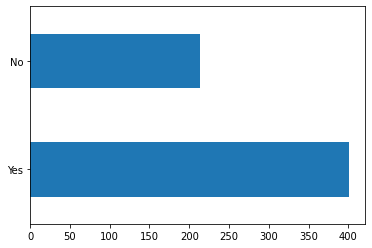

In [15]:
train['Married'].value_counts().plot(kind="barh")

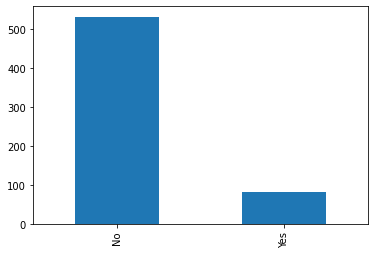

In [16]:
train['Self_Employed'].value_counts().plot(kind="bar")

In [18]:
table_1 = pd.crosstab(train['Loan_Status'], train['Education'])
print(table_1)

Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


In [19]:
def chi_sq_test(x, y):
  table = pd.crosstab(x,y)
  _,p,_,_ = chi2_contingency(table)
  if p < 0.05 :
    print("Reject the Null hypothesis at p: ", round(p,2))
  else :
    print("Failed to Reject the Null hypothesis at p: ", round(p,2))  
  return table



In [20]:
chi_sq_test(train['Loan_Status'], train['Education'])

Reject the Null hypothesis at p:  0.04


Education,Graduate,Not Graduate
Loan_Status,,
N,140,52
Y,340,82


In [21]:
chi_sq_test(Loan_train['Loan_Status'], Loan_train['Gender'])

Failed to Reject the Null hypothesis at p:  0.74


Gender,Female,Male
Loan_Status,,
N,37,155
Y,75,347


<a name = Section7></a>

---
# **7. Post Data Processing**
---


<a name = Section71></a>
### **7.1 Feature Encoding**

In [22]:
from sklearn.preprocessing import LabelEncoder

In [26]:
def encode(df):
  le =LabelEncoder()
  df['Gender'] = le.fit_transform(df['Gender'])
  df['Married'] = le.fit_transform(df['Married'])
  df['Education'] = le.fit_transform(df['Education'])
  df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
  # df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
  df['Property_Area'] = le.fit_transform(df['Property_Area'])
  return df


In [24]:
train_final=encode(train)

In [25]:
train_final.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


In [27]:
test_final=encode(test)

In [28]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1,2


<a name = Section73></a>
### **7.2 Data Preparation**

- **Split** the data into **80:20** inside train_test_split.

- Make sure to set the **random_state = 42**.

---

<details>

**<summary>Hint:</summary>**

- You can use .train_test_split functionality of sklearn package to achieve the objective.

</details>

In [29]:
X= train_final.drop(["Loan_ID", "Loan_Status"], axis=1)
y= train_final['Loan_Status']

In [30]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2


In [31]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    int64  
 10  Property_Area      614 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 52.9 KB


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [34]:
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (491, 11) (491,)
Testing Data Shape: (123, 11) (123,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section, you will develop decision tree-based model.

- Then **analyze the results** obtained and **make observations**.

- For **evaluation purposes** we will **focus** on the **precision and recall score**.

- **Remember** that we want to **generalize results** i.e. same results or error on testing data as that of training data.`

In [44]:
dt = DecisionTreeClassifier(max_depth=4 , min_samples_split= 4)
dt.fit(X_train, y_train)
preds_dt_train = dt.predict(X_train)
preds_dt_test = dt.predict(X_test)

In [45]:
def model_eval(actual, predicted):
  confuison_mat = confusion_matrix(actual, predicted)
  accuracy_scores = accuracy_score(actual, predicted)
  classi_report = classification_report(actual, predicted)
  print(confuison_mat)
  print(accuracy_scores)
  print(classi_report)

Train Evaluation

In [46]:
model_eval(y_train, preds_dt_train)

[[ 73  76]
 [  8 334]]
0.8289205702647657
              precision    recall  f1-score   support

           0       0.90      0.49      0.63       149
           1       0.81      0.98      0.89       342

    accuracy                           0.83       491
   macro avg       0.86      0.73      0.76       491
weighted avg       0.84      0.83      0.81       491



Test Evaluation

In [47]:
model_eval(y_test, preds_dt_test)

[[18 25]
 [ 3 77]]
0.7723577235772358
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



model checking on actual testing data

In [48]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    int64  
 11  Property_Area      367 non-null    int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 34.5+ KB


In [49]:
test_final['CoapplicantIncome']=test_final['CoapplicantIncome'].astype('float64')
test_final= test_final.drop('Loan_ID', axis=1)

In [50]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    float64
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    int64  
 10  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 31.7 KB


In [51]:
preds_dt_test_final = dt.predict(test_final)

In [52]:
df= pd.DataFrame(preds_dt_test_final)
df.value_counts()

1    300
0     67
dtype: int64

Logistic Regression  Model

In [53]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print(confusion_matrix(y_test, pred))

[[18 25]
 [ 1 79]]


In [54]:
model_eval(y_test, pred)

[[18 25]
 [ 1 79]]
0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



logestic regression model applied on actual test data

In [55]:
preds_lg_test_final=logreg.predict(test_final)

In [56]:
df1= pd.DataFrame(preds_lg_test_final)
df1.value_counts()

1    308
0     59
dtype: int64

In [57]:
test['Loan_Status']=preds_lg_test_final

In [58]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,0,0,5720,0.0,110.0,360.0,1,2,1
1,LP001022,1,1,1,0,0,3076,1500.0,126.0,360.0,1,2,1
2,LP001031,1,1,2,0,0,5000,1800.0,208.0,360.0,1,2,1
3,LP001035,1,1,2,0,0,2340,2546.0,100.0,360.0,1,2,1
4,LP001051,1,0,0,1,0,3276,0.0,78.0,360.0,1,2,1


In [59]:
test['Loan_Status']= np.where(test['Loan_Status']==1, 'Y', 'N')

In [60]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,0,0,5720,0.0,110.0,360.0,1,2,Y
1,LP001022,1,1,1,0,0,3076,1500.0,126.0,360.0,1,2,Y
2,LP001031,1,1,2,0,0,5000,1800.0,208.0,360.0,1,2,Y
3,LP001035,1,1,2,0,0,2340,2546.0,100.0,360.0,1,2,Y
4,LP001051,1,0,0,1,0,3276,0.0,78.0,360.0,1,2,Y


In [61]:
file_submission=test[['Loan_ID', 'Loan_Status']]

In [62]:
file_submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [63]:
file_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Loan_ID      367 non-null    object
 1   Loan_Status  367 non-null    object
dtypes: object(2)
memory usage: 5.9+ KB


In [64]:
file_submission.to_csv('my_submission.csv', index=False)

<a name = Section9></a>

---
# **9. Conclusion**
---

- We **analyzed different features** and understood their nature and distribution.

- We performed **dummification** our **data** so that it can't affect our model outcome.

- We split the data in a **stratified** fashion and develop a decision tree model and logistic Regression model

- We observed that the **results** obtained by Logistic Regression model better than Decision tree model.